In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from linear_regression import LinearRegression
from gradient_descent import GradientDescent, quad, quadGrad
%matplotlib inline

##### Replicate Graphs from Bishop

regression weights for M = 0
[ 0.1862995]


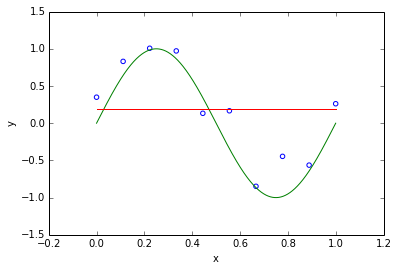

regression weights for M = 1
[ 0.82021246 -1.26782593]


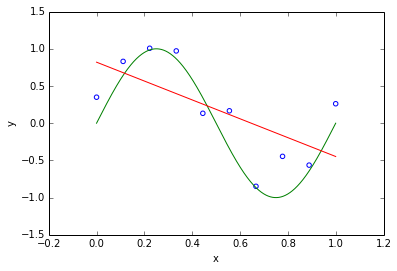

regression weights for M = 3
[  0.31370273   7.98537103 -25.42610224  17.37407653]


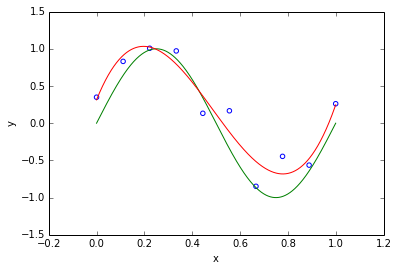

regression weights for M = 9
[  3.49504816e-01   2.32501615e+02  -5.32491163e+03   4.85960473e+04
  -2.31769347e+05   6.40395847e+05  -1.06237835e+06   1.04295956e+06
  -5.57978411e+05   1.25266972e+05]


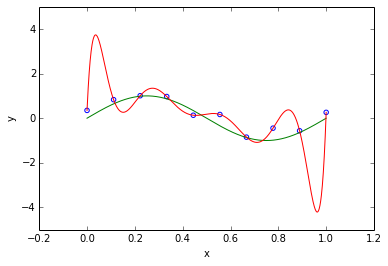

In [13]:
def plotReg(M):
    lr = LinearRegression.fromFile(filename, M)
    w = lr.reg()
    print "regression weights for M = " + str(M)
    print w
    plot(lr,w)
    
def plot(lr,w):
    # plot sin(2*phi*x) in green
    x = np.linspace(0,1,1000)
    sin_x = np.sin(2*np.pi*x)
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    plt.plot(x,sin_x, color='g')
    plt.plot(x, reg_prediction, color='r')
    plt.scatter(lr.x, lr.y, color='b', marker='o',facecolors='none')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
filename = 'curvefitting.txt'
M_vals = (0,1,3,9)
for m in M_vals:
    plotReg(m)

#### Apply gradient descent to SSE

 
--- Minimization Summary --- 
x_min is = [  0.32653765   7.79531798 -24.94762365  17.06390073]
f_min is = 0.350223215826
achieved tolerance = -9.09551016171e-08
numFunctionCalls = 50000
---------------------------- 
 


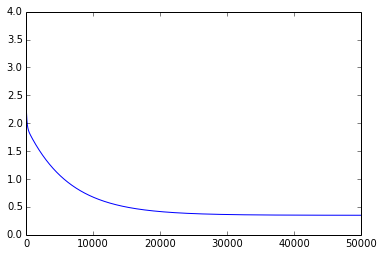

 
--- Scipy Minimization Summary --- 
x_min is = [  0.31370046   7.98538261 -25.42611024  17.37407412]
f_min is = 0.349649887757
numFunctionCalls = 114
---------------------------- 
 
|w_gd - w_ols|^2 is
0.601204053556
 
--- Linear Regression Results ---
x_min is = [  0.31370273   7.98537103 -25.42610224  17.37407653]
f_min is = 0.349649887744
|w_gd - w_ols|^2 is
0.601195216489
|w_scipy - w_ols|^2 is
1.44606668305e-05


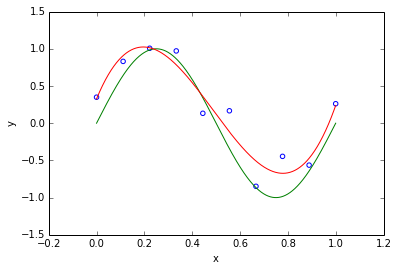

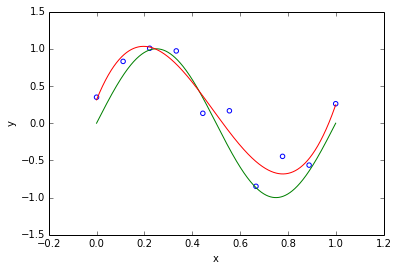

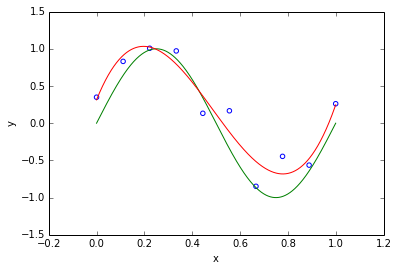

In [26]:
def gradDescentSSE(M):
    lr = LinearRegression.fromFile(filename, M)
    w_initial = -1*lr.reg()
    w_initial = 0*lr.reg()
    gd = GradientDescent(lr.SSE, lr.SSE_gradient)
    gd.stepSize = 0.025
    gd.tol = 1e-8
    (w, sse, _, _) = gd.computeMin(w_initial, printSummary=True, storeIterValues=True, useGradientCriterion=False, maxFunctionCalls=50000)
    gd.plotIterValues()
    
    res = opt.minimize(lr.SSE, w_initial)
    print " "
    print "--- Scipy Minimization Summary --- "
    print "x_min is = " + str(res.x)
    print "f_min is = " + str(res.fun)
    print "numFunctionCalls = " + str(res.nfev)
#     print "numIterations = " + str(res.nit)
    print "---------------------------- "
    print " "
    
    print "|w_gd - w_ols|^2 is"
    print np.linalg.norm(w - res.x)
    
    w_reg = lr.reg()
    print " "
    print "--- Linear Regression Results ---"
    print "x_min is = " + str(w_reg)
    print "f_min is = " + str(lr.SSE(lr.reg()))
    
    print "|w_gd - w_ols|^2 is"
    print np.linalg.norm(w - w_reg)
    
    print "|w_scipy - w_ols|^2 is"
    print np.linalg.norm(res.x - w_reg)
    
    plot(lr,w)
    plot(lr,res.x)
    plot(lr,w_reg)
    plt.show()
    
    
    return (lr, gd, w, sse)

M = 3
(lr, gd, w, sse) = gradDescentSSE(M)


In [4]:
38000/114*1.0

333.0

In [24]:
M = 3
lr = LinearRegression.fromFile(filename, M)
gd = GradientDescent(lr.SSE)
w = lr.reg()
x = 10*w
print "analytical gradient is"
print lr.SSE_gradient(x)
print "numerical gradient is"
print gd.numericalGradient(x)

print "norm is "
print np.linalg.norm(lr.SSE_gradient(x) - gd.numericalGradient(x))

analytical gradient is
[ 33.53391     -6.47653725 -10.52466841  -9.12413007]
numerical gradient is
[ 33.53390999  -6.47653725 -10.52466841  -9.12413009]
norm is 
1.96426838997e-08
